In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import plotly.express as px

# **upload necessary files**

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Task 1
# Linear regression equation

In [ ]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.shape

(15, 2)

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


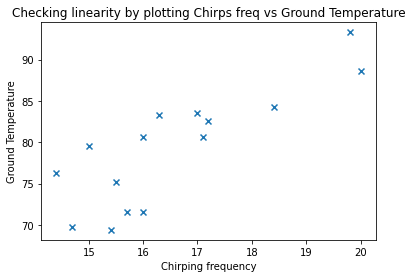

In [ ]:
# plt.figure(figsize=(10,10),dpi=80)
plt.scatter(df['Chirps/Second'],df['Ground Temperature'],marker='x')
plt.title('Checking linearity by plotting Chirps freq vs Ground Temperature')
plt.xlabel('Chirping frequency')
plt.ylabel('Ground Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


**Its having corr of 0.83 which is above -0.2. Hence applying Linear Regression ML**

In [ ]:
df['Chirps/Second'].values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [ ]:
x=df.loc[:,['Ground Temperature']].values
y=df.loc[:,['Chirps/Second']].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)


In [ ]:
y_test

array([[18.4],
       [15.7],
       [16. ]])

In [ ]:
x_train.shape, x_test.shape

((12, 1), (3, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
for i in regressor.intercept_:
  c=i
  print('C value in equation is: ',c)

C value in equation is:  0.07232149389253806


In [ ]:
for i in regressor.coef_[0]:
  m=i
  print('m value in equation is: ',m)

m value in equation is:  0.2071218853657225


In [ ]:
print('The Equation of the model is : '+'y = ' + str(round(m,4)) + 'x' ' + ' + str(abs(round(c,4))))

The Equation of the model is : y = 0.2071x + 0.0723


# Task 2
# plotting original data and equation

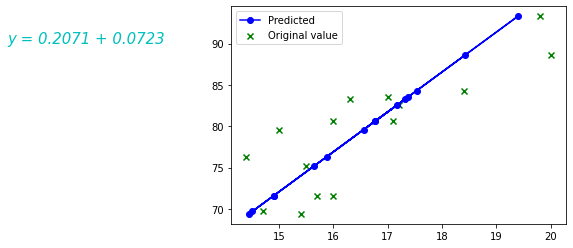

In [ ]:
plt.scatter(df['Chirps/Second'],df['Ground Temperature'],marker='x',color='g',label='Original value')
d=df[['Ground Temperature']].values
y_n=y_pred=regressor.predict(d)
plt.plot(y_n,df['Ground Temperature'],marker='o',color='b',label='Predicted')
plt.legend()
equation = 'y = ' + str(round(m,4)) + '' ' + ' + str(abs(round(c,4)))
plt.text(10,90, equation,fontstyle='italic',fontsize=15,color='c')
plt.show()

# Task 3
# Find the equation's  R2  score

In [ ]:
y_pred=regressor.predict(x_test)
from sklearn import metrics
print('R2 - score',metrics.r2_score(y_test,y_pred))

R2 - score 0.548879380012409


**correleation is above 0.8 but the Equation is moderate to fit for this model**

# TASK 4
# AT  95 temp what wil be the rate of chirp

In [ ]:
chirp = regressor.predict([[95]])
for i in chirp:
  print('If the ground temperature reached 95, then the approximate rate of the crickets to be chirping: ',(round(float(i),2)), ' chirps per second.')

If the ground temperature reached 95, then the approximate rate of the crickets to be chirping:  19.75  chirps per second.


# Task 5
# ground temperature when chirps are 18 per second
Formula is x=(y-c)/m

In [ ]:
print(f'The ground temperature will be: {round(((18-c)/m),1)}°F')

The ground temperature will be: 86.6°F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# Task 1

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.shape

(62, 2)

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


# Check for outliers

Brain cannot be bigger than body

In [ ]:
for i in [df.index[df['Body']<df['Brain']]]:
          df=df.drop(i)
df

,Brain,Body
0,3.385,44.50
1,0.480,15.50
2,1.350,8.10
4,36.330,119.50
5,27.660,115.00
6,14.830,98.20
7,1.040,5.50
8,4.190,58.00
9,0.425,6.40
10,0.101,4.00


In [ ]:
df.describe()

,Brain,Body
count,59.000000,59.000000
mean,84.982695,190.496949
std,342.726611,626.724553
min,0.005000,0.140000
25%,0.515000,3.950000
50%,3.000000,15.500000
75%,31.330000,117.250000
max,2547.000000,4603.000000


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.960084
Body,0.960084,1.000000


In [ ]:
x=df.loc[:,['Body']].values
y=df.loc[:,['Brain']].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
for i in regressor.intercept_:
  c=i
  print('C value is:', c)
for i in regressor.coef_[0]:
  m=i
  print('m value is:',m)
print('*'*60)
print(f'The equation is: y = {round(m,2)}x + ({round(c,2)})')

C value is: -14.900550655851063
m value is: 0.5237611743704428
************************************************************
The equation is: y = 0.52x + (-14.9)


# Task 2

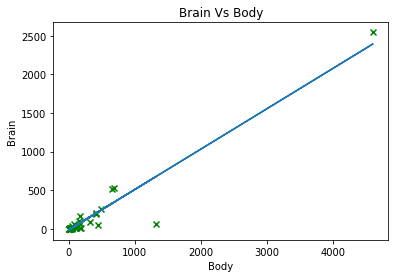

In [ ]:
d=df[['Body']].values
y_n=regressor.predict(d)
plt.plot(df['Body'],y_n,label='predicted')
plt.scatter(df['Body'],df['Brain'],marker='x',color='g',label='Original')
plt.title('Brain Vs Body')
plt.ylabel('Brain')
plt.xlabel('Body')
plt.show()

# Task 3

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
from sklearn import metrics
print('R2 score is:',metrics.r2_score(y_test,y_pred))

R2 score is: 0.711919339864032


**Our R2 score is 0.71 which indicates a good model**

---



# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

# Task 1
finding Linear regression equations of columns 1 to 5

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.shape

(52, 6)

In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(52, 6)

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


**Checking outliers**

In [ ]:
Q3=df['Salary'].max()
Q1=df['Salary'].min()
IQR=Q3-Q1
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)
print('remove salaries which are above',upper_limit)
print('remove salaries which are below',lower_limit)

remove salaries which are above 72612.5
remove salaries which are below -19567.5


In [ ]:
df=df.drop(df['Salary']<lower_limit,errors='ignore')
df=df.drop(df['Salary']>upper_limit,errors='ignore')
df.shape

(52, 6)

**There are no outliers in our data**

In [ ]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [ ]:
fig=px.box(df,x='Sex',y='Salary')
fig.show()

**EDA**

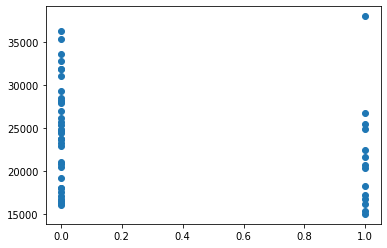

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
plt.scatter(df['Sex'],df['Salary'])
plt.show()
df[['Sex','Salary']].corr()

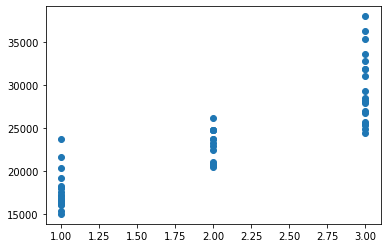

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
plt.scatter(df['Rank'],df['Salary'])
plt.show()
df[['Rank','Salary']].corr()

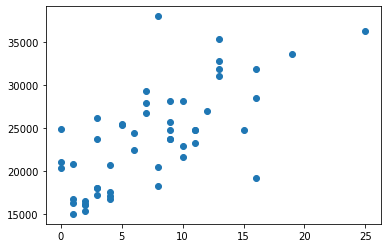

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
plt.scatter(df['Year'],df['Salary'])
plt.show()
df[['Year','Salary']].corr()

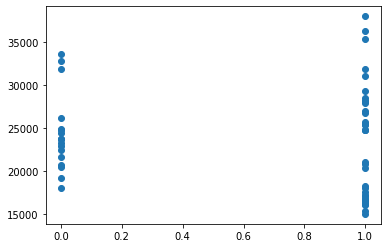

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
plt.scatter(df['Degree'],df['Salary'])
plt.show()
df[['Degree','Salary']].corr()

**Non linear relationship.**

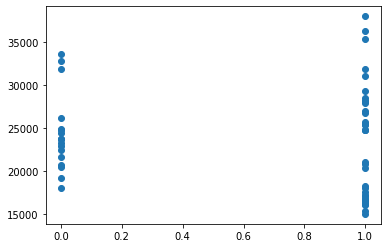

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df['transformed']=np.square(df['Degree'])
plt.scatter(df['transformed'],df['Salary'])
plt.show()
df[['transformed','Salary']].corr()

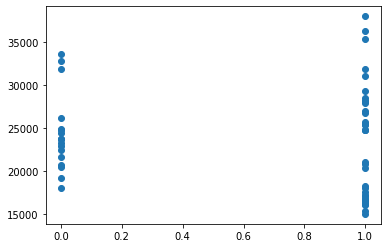

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df['transformed']=np.power(df['Degree'],0.5)
plt.scatter(df['transformed'],df['Salary'])
plt.show()
df[['transformed','Salary']].corr()

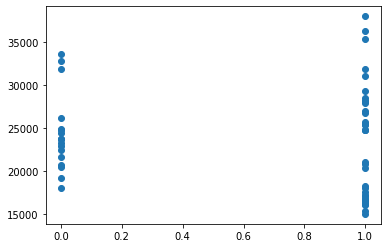

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df['transformed']=np.power(df['Degree'],3)
plt.scatter(df['transformed'],df['Salary'])
plt.show()
df[['transformed','Salary']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



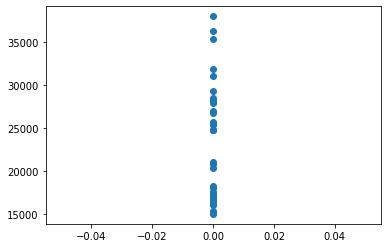

,transformed,Salary
transformed,NaN,NaN
Salary,NaN,1.0


In [ ]:
df['transformed']=np.log(df['Degree'])
plt.scatter(df['transformed'],df['Salary'])
plt.show()
df[['transformed','Salary']].corr()

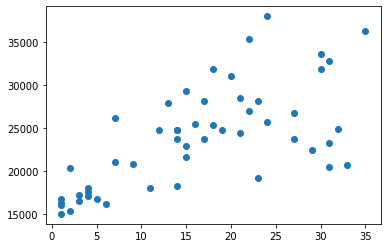

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
plt.scatter(df['YSdeg'],df['Salary'])
plt.show()
df[['YSdeg','Salary']].corr()

In [ ]:
def r2check(v):
  tsize=0.4
  x=df[v].values
  y=df[['Salary']].values
  # x_train=x
  # x_test=x
  # y_train=y
  # y_test=y
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=tsize,random_state=0)
  from sklearn.linear_model import LinearRegression
  regressor=LinearRegression()
  regressor.fit(x_train,y_train)
  y_pred=regressor.predict(x_test)
  print(f"R2 score of {', '.join([str(i) for i in v])} is : {round(((metrics.r2_score(y_test,y_pred))*100),1)}%")

In [ ]:

# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
tsize=0.4
x=df[['Sex','Rank','Year','YSdeg','Degree']].values
y=df[['Salary']].values
# x_train=x
# x_test=x
# y_train=y
# y_test=y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=tsize,random_state=0)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
from sklearn import metrics
print(f"R2 score is : {round(((metrics.r2_score(y_test,y_pred))*100),1)}%")

R2 score is : 74.8%


In [ ]:
r2check(['Sex','Rank','Year','YSdeg','Degree'])

R2 score of Sex, Rank, Year, YSdeg, Degree is : 74.8%


In [ ]:
regressor.coef_

array([[1262.76038187, 5287.48271482,  452.10595306,  -28.91926475,
         698.3736893 ]])

In [ ]:
c=regressor.intercept_[0]

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['coefficient'],columns=['Sex','Rank','Year','YSdeg','Degree'])
df1=coeff_df.transpose()
df1

,coefficient
Sex,1262.760382
Rank,5287.482715
Year,452.105953
YSdeg,-28.919265
Degree,698.373689


**Equations of each column**

In [ ]:
for i in range(5):
  print(f"Equation of column {df.columns[i]} is y = {round(df1['coefficient'][i],2)}x + {round(c,2)}")

Equation of column Sex is y = 1262.76x + 9315.27
Equation of column Rank is y = 5287.48x + 9315.27
Equation of column Year is y = 452.11x + 9315.27
Equation of column Degree is y = -28.92x + 9315.27
Equation of column YSdeg is y = 698.37x + 9315.27


# Task 2

In [ ]:
cols=['Sex','Rank','Year','YSdeg','Degree']
for i in range(0,5):
  r2check([cols[i]])  

R2 score of Sex is : 15.5%
R2 score of Rank is : 67.6%
R2 score of Year is : 54.2%
R2 score of YSdeg is : 13.2%
R2 score of Degree is : 0.6%


**Considering two columns with a decent R2 sscore: Rank and Year.**

In [ ]:
r2check(['Rank','Year'])

R2 score of Rank, Year is : 79.7%


# **Task 3**

In [ ]:
r2check(['Sex'])

R2 score of Sex is : 15.5%


# **Conclusion from column selection with best R2 scores is-**
# **A poor R2 score of Gender column. Hence, it is not a factor in the Salary ⚡**